# Introduction
_________________
For our project we wanted to use a direct approach, we wanted to have a clear answer and for that reason we looked into data sets that had decisive information that we could take and apply to graphs or charts. We explored a lot of different alternitives, but one major one we might have done was the best neighborhood for street racing. We thought that could be cool, we would look into the lengths of streets and such. Ultimately we deicded on the best neighborhood to become a athlete in. This was because we could use numbers to prove this. We looked into how many sports facilites each neighborhood has and based on that we know there is more access to become better as a player. Also this  gives the player more options to find the one they like the most.
_______________________________

# The Metric Explanation(Courts and Rinks)
Jake D'Ambola
_________________________________
For my metric I looked into the number of courts and rinks at any athletes disposal. Rinks included ice rinks, roller rinks and even street hockey rinks. The courts included many different types ranging from Basketball courts to Pickle ball courts. I did not want exclude any because I just wanted to see where the best place to be athletic in general would be, I wanted every possible data information I could get. So I am measuring the amount of courts and rinks in each Pittsburgh neighborhood. I only had to use one dataset since it included both courts and rink locations along with other details.



## Courts and Rinks Data

In [15]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas


In [16]:
df = pd.read_csv("hood/courts_and_rinks.csv")#reading in the dataset


df.head(5)#displaying 5 rows
#Just to show the different types of courts I used

,_id,id,name,type,park,location,surface_material,grandstand,inactive,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,1592343416,Allegheny Commons Basketball Court 1,Basketball (Full),Allegheny Commons,NaN,NaN,0,f,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.454443,-80.008104
1,2,1365248699,Allegheny Commons Park Tennis Court 1,Tennis,Allegheny Commons,NaN,Asphalt,0,f,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.452400,-80.012531
2,3,1757180821,Allegheny Commons Park Tennis Court 2,Tennis,Allegheny Commons,NaN,Asphalt,0,f,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.452238,-80.012150
3,4,744303307,Allegheny Commons Park Tennis Court 3,Tennis,Allegheny Commons,NaN,Asphalt,0,f,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.452075,-80.011767
4,5,1157777481,Alton Park Basketball Court 1,Basketball (Half),Alton Park,NaN,Asphalt,0,f,Beechview,4,19,42003191600,5,19,6,4-28,40.414152,-80.022305


Above I am just showing the variation in types of courts, I want to include every type of court. We don't have a standard for being athletic so every court/rink should count towards making that particular neighborhood a better fit for athletes.

Text(0.5, 1.0, 'Courts and Rinks')

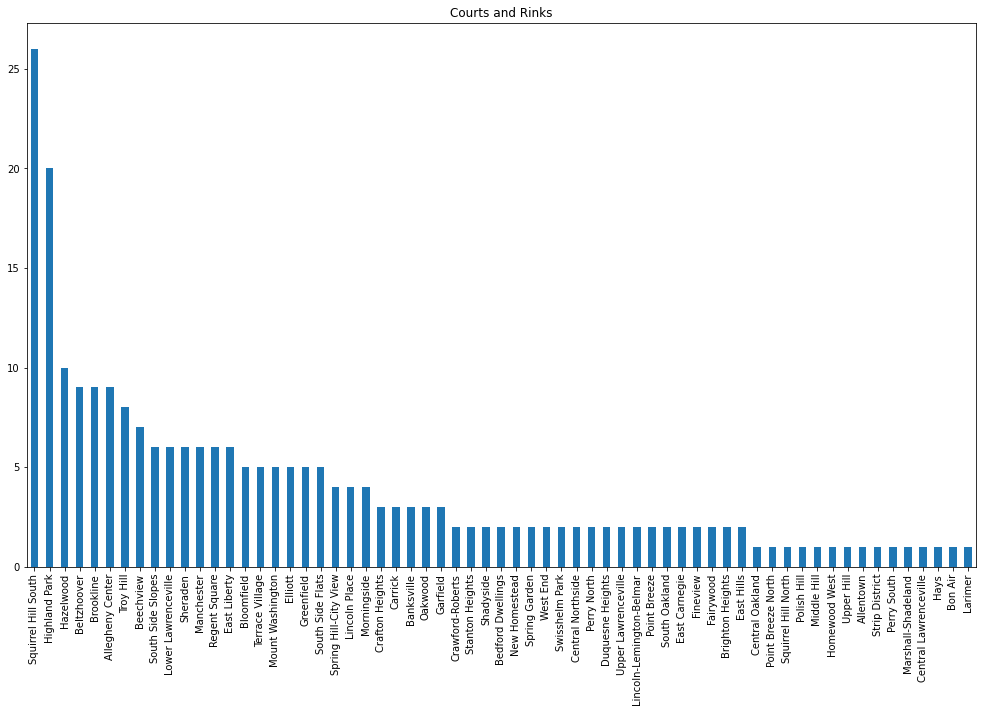

In [17]:
neighborhood = df ["neighborhood"].value_counts() #naming data to neighborhood
plt.figure(figsize=(17,10)) #sizing
neighborhood.plot(kind='bar') #bar graph
plt.title("Courts and Rinks") #title

Now I am taking the data from every neighborhood and displaying clearly how many courts and rinks each neighborhood has. I used this chart since it is a good way to show what the top neighborhoods are. Squirrel Hill South, Highland Park and Hazelwood are the top three. This bar graph is great for showing data from each neighborhood.

In [18]:
neighborhoods = geopandas.read_file("hood/Neighborhoods_.shp") 
courts_map =  neighborhoods.merge(df, how='left', left_on='hood', right_on='neighborhood')    #merging data so it can be put into map

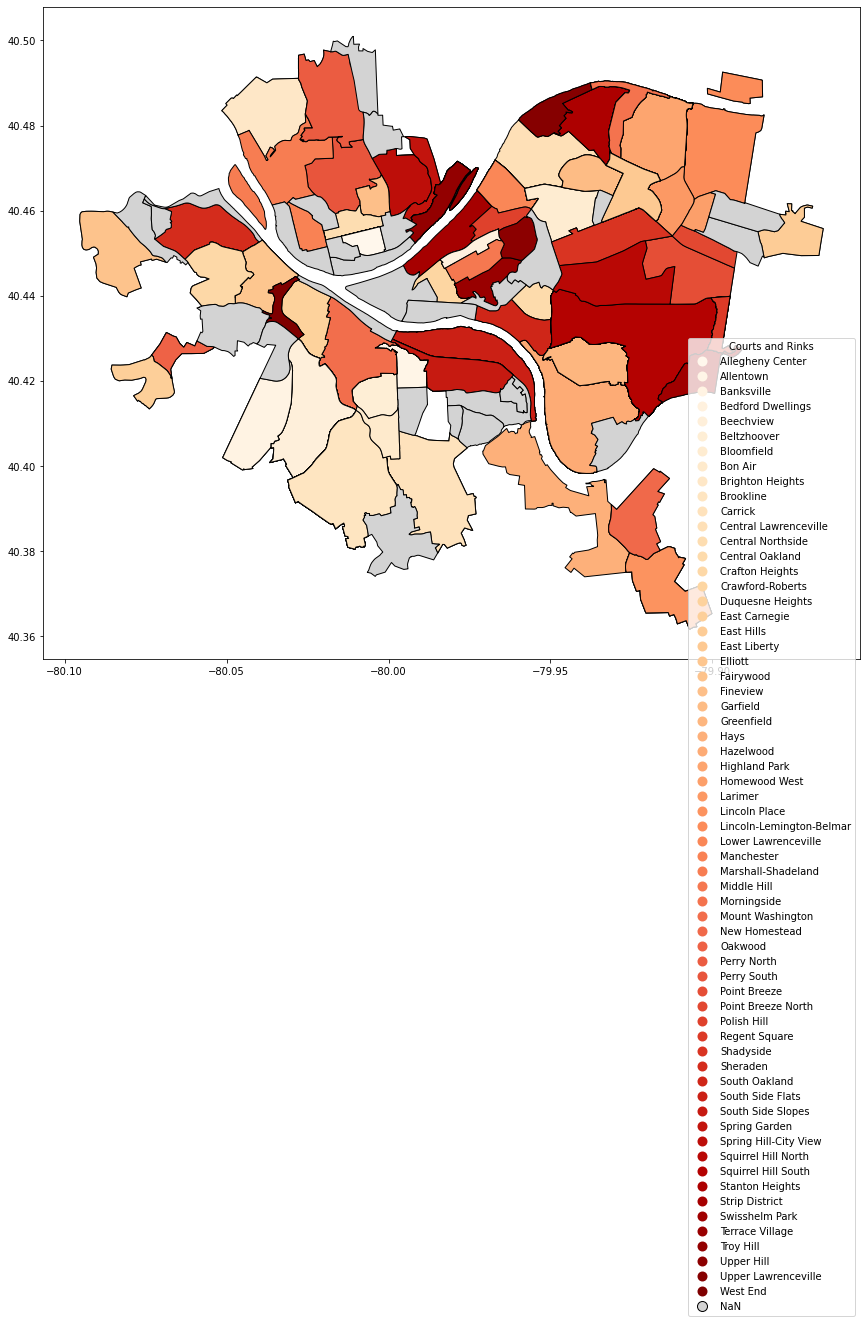

In [19]:
import matplotlib.pyplot as plt

ax = courts_map.plot(column='neighborhood', cmap='OrRd', edgecolor="black", legend=True, #plotting 'neighborhood' with data color orange and red with a legend
                     figsize=(15, 12), missing_kwds={"color": "lightgrey"})

# Add Legend
legend = ax.get_legend()
legend.set_title("Courts and Rinks")
legend.set_bbox_to_anchor((1, 0.5))  # Adjust the values to move the legend

# Show the plot
plt.show()

Here is a map of Pittsburgh and a legend with all of the neighborhoods that I am taking into consideration for most courts and rinks. I wanted to have every neighborhood listed just to show my slimming down process and how I am going to work through the given data to highlight only the important ones that have the most amount. There are many neighborhoods so I will begin to highlight the important ones and cut out the non important ones.

No handles with labels found to put in legend.


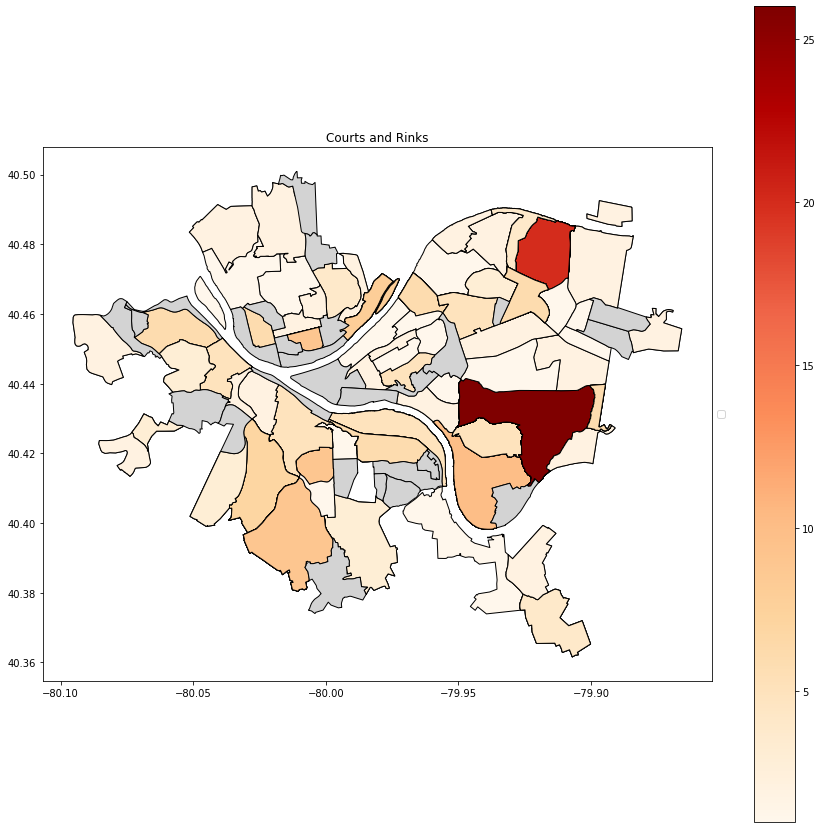

In [24]:
court_counts = courts_map.groupby('neighborhood').size().reset_index(name='court_count') #group courts map dataframe by neighborhood column in csv then count occurences of neighborhoods.

courts_map = pd.merge(courts_map, court_counts, on='neighborhood', how='left')  #merge calculated court counts back into original

ax = courts_map.plot(column='court_count', cmap='OrRd', edgecolor="black", legend=True,  #just plot now,
                     figsize=(15, 15), missing_kwds={"color": "lightgrey"})

legend = ax.legend(bbox_to_anchor=(1, 0.5), loc='center left')
plt.title('Courts and Rinks')
# Show the plot
plt.show()

Now I have each neighborhood highlighted so we can clearly see which ones have the most. This heatmap does a great job for showing differeneces and where the majorty are. We now see which ones are the top, but we don't know their exact name so now we can use the bar graph of this data set below to see what each highlighted part is.

In [21]:
court_counts = courts_map.groupby('neighborhood').size().reset_index(name='court_count') #group courts map dataframe by neighborhood column in csv then count occurences of neighborhoods.

total_counts = court_counts.groupby('neighborhood')['court_count'].sum().reset_index(name='total_count') #group the court counts data frame by the neighborhood column and sum it

top_five_neighborhoods = total_counts.nlargest(10, 'total_count')#print the top 10 largest


print("Top Five Neighborhoods with the Highest Total Court Counts:\n")
print(top_five_neighborhoods[['neighborhood', 'total_count']].to_string(index=False))

Top Five Neighborhoods with the Highest Total Court Counts:

       neighborhood  total_count
Squirrel Hill South           26
      Highland Park           20
          Hazelwood           10
   Allegheny Center            9
        Beltzhoover            9
          Brookline            9
          Troy Hill            8
          Beechview            7
       East Liberty            6
Lower Lawrenceville            6


Now we see even more clearly our top 10 neighborhoods for most courts and rinks in Pittsburgh.

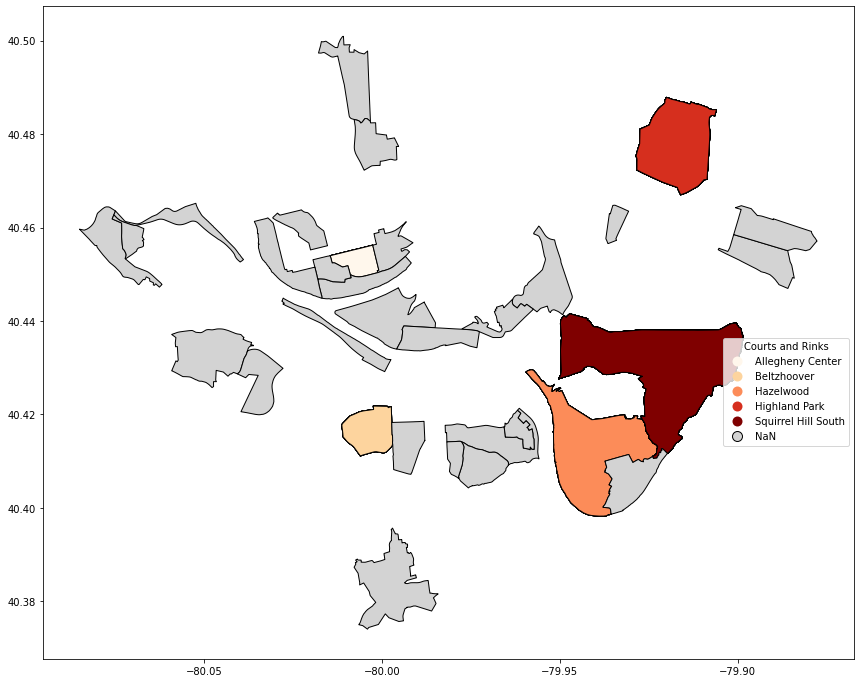

In [22]:
# List of neighborhoods to exclude
exclude_neighborhoods = ['Allentown', 'Banksville', 'Beechview','Bedford Dwellings','Bloomfield','Bon Air','Brighton Heights','Brookline','Carrick','Central Lawrenceville','Central Northside','Central Oakland','Crafton Heights','Crawford-Roberts','Duquesne Heights',
                        'East Carnegie','East Hills','East Liberty','Elliott','Fairywood','Fineview','Garfield','Greenfield','Hays','Homewood West','Larimer','Lincoln Place','Lincoln-Lemington-Belmar','Lower Lawrenceville','Manchester','Marshall-Shadeland','Middle Hill','Morningside','Mount Washington','New Homestead','Oakwood','Perry North','Perry South','Point Breeze','Point Breeze North','Polish Hill','Regent Square','Shadyside','Sheraden','South Oakland','South Side Flats','South Side Slopes','Spring Garden','Spring Hill-City View','Squirrel Hill North','Stanton Heights','Strip District','Swisshelm Park','Terrace Village','Troy Hill','Upper Hill','Upper Lawrenceville','West End','NaN']

# Filter the GeoDataFrame to exclude specified neighborhoods
filtered_courts_map = courts_map[~courts_map['neighborhood'].isin(exclude_neighborhoods)]

# Plot the filtered map
ax = filtered_courts_map.plot(column='neighborhood', cmap='OrRd', edgecolor="black", legend=True,
                              figsize=(15, 12), missing_kwds={"color": "lightgrey"})

# Add Legend
legend = ax.get_legend()
legend.set_title("Courts and Rinks")
legend.set_bbox_to_anchor((1, 0.5))  # Adjust the values to move the legend

# Show the plot
plt.show()

Finally, this is all of my data in one spot plotted out. We can see the top five areas we are focusing on and we can see each name. We can now fully tell that Squirrel Hill South is the best spot(for courts and rinks) to become a athlete in. Looking back on all the graphs we can tell that Squirrel Hill South beats out Highland Park by six so the top two are very good options.

____________________
NEXT Section